In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score

In [11]:
df = pd.read_parquet(r"E:\Hydroneo\Analytics\disease\data\cleaned_data_removed_ZERO.parquet", engine="pyarrow")

print(df.head())

                         id   latitude   longitude
0  66fd107a636caa2b6a7218b8  16.335354  102.254739
1  6707853b97fb7a0c60569ad7  13.706300  100.459700
2  670e17dd97fb7a0c60b3820b  13.706300  100.459700
3  670e182e97fb7a0c60b38670  13.753165  100.494722
4  670e191297fb7a0c60b392a1  13.706300  100.459700


In [13]:
coords = df[['latitude', 'longitude']].to_numpy()

# Try different k
k_list = range(2, 21)  # silhouette score not defined for k=1
scores = []

for k in k_list:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(coords)
    score = silhouette_score(coords, labels)
    scores.append(score)
    

e:\Hydroneo\Analytics\venv-analytics\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
e:\Hydroneo\Analytics\venv-analytics\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
e:\Hydroneo\Analytics\venv-analytics\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
e:\Hydroneo\Analytics\venv-analytics\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  return fit_method(estimator, *args

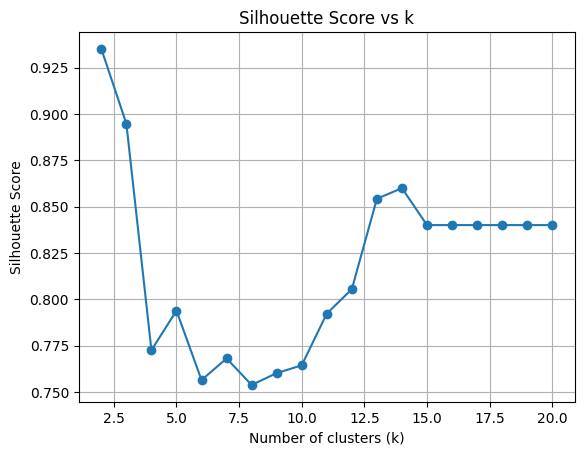

In [14]:
plt.plot(k_list, scores, marker="o")
plt.title("Silhouette Score vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [18]:
best_score = max(scores)
best_k = k_list[scores.index(best_score)]

print(f"Best k = {best_k}, with silhouette score = {best_score:.4f}")

Best k = 2, with silhouette score = 0.9351


e:\Hydroneo\Analytics\venv-analytics\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
e:\Hydroneo\Analytics\venv-analytics\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
e:\Hydroneo\Analytics\venv-analytics\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
e:\Hydroneo\Analytics\venv-analytics\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  return fit_method(estimator, *args

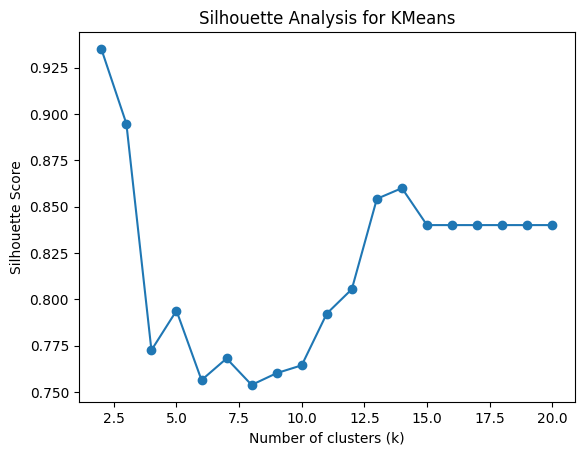

In [17]:
from sklearn.metrics import silhouette_score

sil_scores = []
k_list = range(2, 21)  # silhouette needs >= 2 clusters
for k in k_list:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(coords)
    sil_scores.append(silhouette_score(coords, labels))

plt.plot(k_list, sil_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans")
plt.show()
